# Exercise 6

## Recall

Basics: List four typical methods applied in the context of Knowledge Discovery from Databases (KDD) applications and briefly describe them!

Basics: List and describe the 6 phases of the CRISP-DM model!

Basics: What should happen during the evaluation phase?

Evaluation: Define the accuracy measure.

Evaluation: What is class imbalance and why can it cause a high accuracy even though the classifier is bad? Give an example.

Evaluation: In what applications is precision more important than recall, and in which applications is recall more important than precision?

Evaluation: What is grouped cross validation and when should you use it? Come up with an example and iterate all splits.

Statistics: Multiple hypothesis comparison

1) Explain what the multiple hypothesis comparison is and why it is a problem (refer to p-values in the process).
2) What is a way to correct for multiple hypothesis comparison. Give a concrete example.
3) What is the difference between an $\alpha$-value and a p-value?

## Univariate analysis

### Load the data

In [2]:
# imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RepeatedStratifiedKFold

from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
data_titanic = pd.read_csv("exercise_01_intro-to-python_titanic.csv", index_col="PassengerId")

In [4]:
def extract_features(data):
    """Extract features from existing variables"""
    
    data_extract = data.copy()
    
    # name
    name_only = data_extract["Name"].str.replace(r"\(.*\)", "", regex=True)
    first_name = name_only.str.split(", ", expand=True).iloc[:,1]
    title = first_name.str.split(".", expand=True).iloc[:,0]
    data_extract["Title"] = title
        
    # ticket
    
    # ...
    
    return data_extract
    
data_extract = extract_features(data_titanic)

In [5]:
def preprocess(data):
    """Convert features into numeric variables readable by our models.""" 
    
    data_preprocessed = data.copy()
    
    # Sex
    
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex"], drop_first=True)
    
    # Embarked
    
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Embarked"], dummy_na=True)
    
    # Title
    title = data_preprocessed["Title"]
    title_counts = title.value_counts()
    higher_titles = title_counts[title_counts < 50]
    title_groups = ["higher" if t in higher_titles else t for t in title]
    data_preprocessed["Title"] = title_groups
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Title"])
    
    # drop the rest
    data_preprocessed.drop(columns=["Name", "Cabin", "Ticket"], inplace=True)
    
    return data_preprocessed

data_preprocessed = preprocess(data_extract)

In [6]:
# before inspecting the data, selecting and building models, etc. 
# FIRST split data into train and test data (we set the test data size to 30%)

X = data_preprocessed.drop(columns="Survived")
y = data_preprocessed["Survived"]

In [7]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Title_Miss,Title_Mr,Title_Mrs,Title_higher
PassengerId,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,True,False,False,True,False,False,True,False,False
2,1,38.0,1,0,71.2833,False,True,False,False,False,False,False,True,False
3,3,26.0,0,0,7.9250,False,False,False,True,False,True,False,False,False


### Univariate comparison

In [8]:
from scipy.stats import spearmanr, mannwhitneyu, ranksums

In [9]:
# for each feature calculate whether there is a statistical difference between survivors (1) and victims (0)
tests = {}
for c in X.columns:
    # TODO: fill this in by computing the test statistic for each feature columns!
    # tests[c] = mannwhitneyu()
    pass
tests

{}

Which is the feature most associated with surviving?

Is the association with `Survived` positive or negative?

In [12]:
# calculate the spearman correlation between all features
tests = {}
for c1 in X.columns:
    for c2 in X.columns:
        # TODO: fill this on
        # tests[(c1, c2)] = spearmanr()
        pass
tests

{}

In [14]:
# we can do the same with a pandas function:
corr = X.corr(method="spearman")

<Axes: >

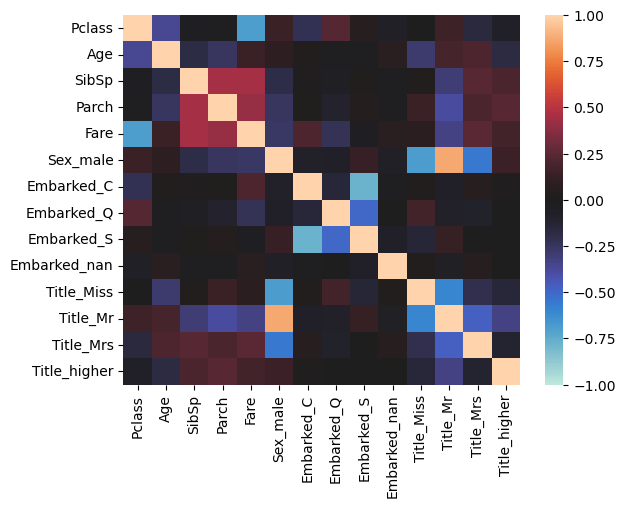

In [15]:
# and plot it
sns.heatmap(corr, center=0, vmin=-1, vmax=1)

What is the maximum and minimum value of the Spearman correlation coefficient and what do they mean?

> **Answer:** -1 (strong negative correlation) and 1 (strong positive correlation)

What is the strongest correlation of all feature pairs?

> **Answer:** Check `tests`

## BONUS:

Plot a scatter plot with each point representing a feature (e.g., using t-SNE for dimensionality reduction), the size represention the assciation to `Survived`, the color corresponding to the direction of the association, and ines between the features if their absolute correlation exceeds 0.5.